<a href="https://colab.research.google.com/github/HannaSuh0/colab/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install feedparser
import feedparser
import pandas as pd

key_word = []
hit = []
feed = feedparser.parse('https://trends.google.co.kr/trends/trendingsearches/daily/rss?geo=KR')
#print(feed)

for post in feed.entries :
  key_word.append(post['title']) 
  hit.append(str(post['ht_approx_traffic'])[:-1].replace(",","")) # 콤마 및 숫자 뒤 + 제거

df = pd.DataFrame(data = zip(key_word, hit))
df.columns = ['키워드', '클릭수']
df['클릭수'] = df['클릭수'].apply(pd.to_numeric)
df

,키워드,클릭수
0,이승기,20000
1,윤석열,10000
2,정국,10000
3,KBS,5000
4,MBC,5000
5,우루과이,2000
6,2022 월드컵!,500000
7,박주호,5000
8,김종민,2000
9,신천지,2000


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

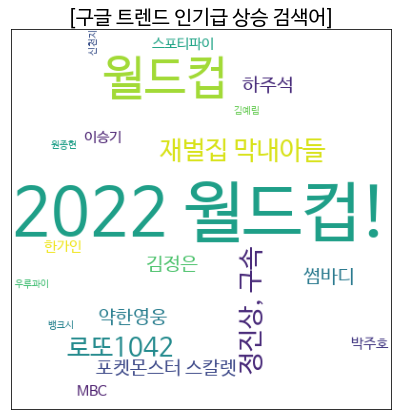

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = df.set_index("키워드").to_dict()["클릭수"] # 데이터 프레임을 딕셔너리로 변경
#print(wc)
plt.rc('font', family='NanumBarunGothic')
word_cloud = WordCloud(font_path = "NanumBarunGothic", width = 400, height = 400, max_font_size=300,background_color = 'white').generate_from_frequencies(wc) 

plt.figure(figsize=(7,7))
plt.title('[구글 트렌드 인기급 상승 검색어]', fontsize=20)
plt.imshow(word_cloud)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

(-0.5, 224.5, 224.5, -0.5)

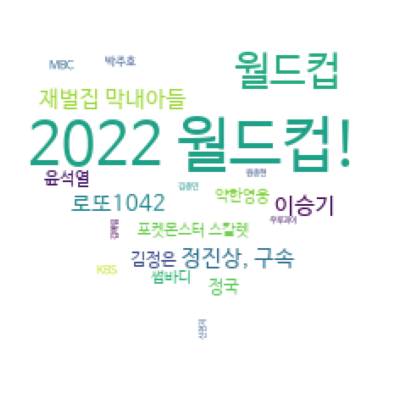

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open('/zzzzzz.jpeg')
imgArray = np.array(img) # 이미지의 각 셀을 수치로 변환
#print(imgArray)
wc = df.set_index("키워드").to_dict()["클릭수"] # 데이터 프레임을 딕셔너리로 변경
#print(wc)
plt.rc('font', family='NanumBarunGothic')
wordCloud = WordCloud(font_path = "NanumBarunGothic", width = 400, height = 400, max_font_size=300, mask = imgArray, background_color = 'white').generate_from_frequencies(wc) 

plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.axis('off')